<img src="header.jpg" alt="header">

# Smart Police Station (SPS) Dubai
Traditional police stations in Dubai have been revolutionized and automated by using the most advanced and cutting-edge technology. The Smart Police Stations (SPS) aim to reduce customer visits to traditional stations and government offices by 80 percent, and they will eventually be present in all residential and commercial areas. The SPS was envisioned and executed to be the first of its kind, providing 30 specific online police services in six different languages. These stations are unmanned and designed to allow customers to apply and complete legal tasks without the assistance of any police officers.

<img src="sps1.jpg" alt="sps1">

Each smart police station is intended to be amidst the public in crowded areas. Its branding and signage deviate from the normal police standards to give customers a friendly and welcoming feel.
SPS offers multiple online services including Criminal Services, Traffic Services, Certificates/Permit Services, and Community Services. All of them accessible by Dubai's resident and also tourists

<img src="sps22.jpg" alt="sps2">

<img src="sps3.jpg" alt="sps3">

# About this analysis and research
This exercise of research is looking to analyse the SPS locations across different areas of Dubai considering factors like demographic density distribution and type of public services available that sorrounds the stations in a near radius. These are important factors that can influence the traffic and visits to the SPS facilities, analizing the context of each SPS in the city can help to understand how to allocate the upcoming spots in the future.

### 1. SPS Locations & demographic density
This objective finds to analyse the geolocation of SPS across Dubai and contrast this to the demographic density distribution by community areas. To it so was used a public dataset from Dubai Statistics Center which is available in their website under name "Number of Estimated Population by Sector and Community" from year 2019. Using this data along to the geolocations of SPS we are able to plot a map that illustrate this relation.

Data source: https://www.dsc.gov.ae/en-us/Themes/Pages/Population-and-Vital-Statistics.aspx?Theme=42


### 2. SPS Contextual analysis extracting data with Foursquare API
This exercise is exploring the near context of the SPS locations using Foursquare API.  Each SPS venue is scanned in a radius of 1Km, extracting data of public services available into this range and consolidating this information in a full dataset that covers all the SPS locations.


### 3. Distribution of public services across SPS locations
In this exercise we render the public service categories distribution related to SPS locations using Foursquare data and a boxplot chart. This provide a quick visualization showing this relation.

### 4. Number of public services near to SPS locations
In this exercise we understand the relation of quantity of public services near to SPS spots using  a bar chart that can provide detailed view of them by category.

### 5. Percentage of public services close to SPS locations
Utilizing a pie-chart we represent the percentage values related to public services close the SPS locations.

### 6. Segmentation & Geo-distribution of public services at SPS locations
In order to understand how the public services are geo-distributed near to SPS locations, in this exercise we can see a work of segmentation and geolocation of these points at each SPS spot on the map.


#### Importing libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import geopandas
import folium

#machine learning models
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import requests # library to handle requests
import json # library to handle JSON files

import seaborn as sns #plotting
import matplotlib.pyplot as plt

## 1. SPS Locations & Demographic Density

In [3]:
df_geo = geopandas.read_file('dxb-data/dubai.geojson')
df_geo.head(3)

CNAME_E                  CNAME_A  \
0                 HEFAIR                     حفير   
1  AL QUSAIS IND. SECOND  القصيص الصناعية الثانية   
2            AL JAFILIYA                 الجافلية   

                   COMMUNITY_E                    COMMUNITY_A COMM_NUM  \
0                 HEFAIR - 991                     حفير - 991      991   
1  AL QUSAIS IND. SECOND - 243  القصيص الصناعية الثانية - 243      243   
2            AL JAFILIYA - 323                 الجافلية - 323      323   

      SHAPE_AREA      SHAPE_LEN Sector  Population 2018  Population 2019  \
0  143566502.005  51721.2111825      9                0                0   
1   1728332.8155   6052.3652815      2             8063             8834   
2   1669479.4215  5220.96603607      3            21957            23963   

   Area Sq Km   Latitude  Longitude  \
0  143.565131  24.693237  55.249140   
1    1.728331  25.281654  55.393184   
2    1.669479  25.237635  55.286851   

                                            geometry  
0  POLYGON ((55.24246 24.74379, 55.26266 24.74935...  
1  POLYGON ((55.39830 25.29000, 55.39917 25.28948...  
2  POLYGON ((55.28809 25.24352, 55.28829 25.24341...

#### Smart Police Station locations

In [4]:
df_geo_sps = geopandas.read_file('dxb-data/sps_location.geojson')
df_geo_sps

SPS_Name             AREA        LAT        LON  \
0              SPS Al Seef          Al Seef  25.264600  55.299832   
1      SPS Arabian Ranches  Arabian Ranches  25.055790  55.268540   
2            SPS City Walk        City Walk  25.204714  55.260565   
3        SPS Palm Jumeirah    Palm Jumeirah  25.110422  55.140157   
4               SPS La Mer           La Mer  25.233247  55.259622   
5                   SPS D3               D3  25.187302  55.295386   
6           SPS Muraqqabat       Muraqqabat  25.269955  55.326627   
7  SPS Dubai Silicon Oasis    Silicon Oasis  25.127808  55.394584   
8      SPS HQ Dubai Police    Al twar first  25.275452  55.358192   

                    geometry  
0  POINT (55.29983 25.26460)  
1  POINT (55.26854 25.05579)  
2  POINT (55.26056 25.20471)  
3  POINT (55.14016 25.11042)  
4  POINT (55.25962 25.23325)  
5  POINT (55.29539 25.18730)  
6  POINT (55.32663 25.26996)  
7  POINT (55.39458 25.12781)  
8  POINT (55.35819 25.27545)

#### Dubai Population Density Calculation

In [5]:
pden = df_geo['Population 2019'] / df_geo['Area Sq Km']
df_den = pd.DataFrame (pden,columns=['Population Density'])
df_den = df_den.astype({'Population Density':'int'})
df_den.head()

Population Density
0                   0
1                5111
2               14353
3                 310
4                1301

In [6]:
#Adding Density column

df_dxb = pd.concat([df_geo,df_den], axis=1)
df_dxb.drop(['CNAME_A','COMMUNITY_A'], axis=1, inplace=True)
df_dxb.head()

CNAME_E                  COMMUNITY_E COMM_NUM     SHAPE_AREA  \
0                 HEFAIR                 HEFAIR - 991      991  143566502.005   
1  AL QUSAIS IND. SECOND  AL QUSAIS IND. SECOND - 243      243   1728332.8155   
2            AL JAFILIYA            AL JAFILIYA - 323      323   1669479.4215   
3       JABAL ALI SECOND       JABAL ALI SECOND - 592      592   5059596.0639   
4         WADI AL SAFA 5         WADI AL SAFA 5 - 648      648  16319666.8572   

       SHAPE_LEN Sector  Population 2018  Population 2019  Area Sq Km  \
0  51721.2111825      9                0                0  143.565131   
1   6052.3652815      2             8063             8834    1.728331   
2  5220.96603607      3            21957            23963    1.669479   
3  10664.7225181      5             1561             1570    5.059545   
4  22350.6627618      6            19550            21241   16.318810   

    Latitude  Longitude                                           geometry  \
0  24.693237  55.249140  POLYGON ((55.24246 24.74379, 55.26266 24.74935...   
1  25.281654  55.393184  POLYGON ((55.39830 25.29000, 55.39917 25.28948...   
2  25.237635  55.286851  POLYGON ((55.28809 25.24352, 55.28829 25.24341...   
3  25.053979  55.115282  POLYGON ((55.13269 25.06475, 55.12714 25.05840...   
4  25.077814  55.352154  POLYGON ((55.37906 25.10325, 55.37908 25.10322...   

   Population Density  
0                   0  
1                5111  
2               14353  
3                 310  
4                1301

#### Rendering data into the map

In [7]:
#Equal frequency discretization to create bins

bins, intervals = pd.qcut(df_dxb['Population Density'], 8, labels=None, retbins=True, precision=3, duplicates='raise')


In [8]:
#Map setup

from branca.colormap import linear
import branca.colormap as cmp

cm_linear = linear.YlGnBu_09
cm_linear.index = intervals # bins
cm_linear.vmin=df_dxb['Population Density'].min()
cm_linear.vmax=df_dxb['Population Density'].max()

def style_function(feature):
    pop_d = feature['properties']['Population Density']
    return {
        'fillColor': '#fefff7' if pop_d < 4 else cm_linear(pop_d),
        'color': 'black',
        'weight': 1,
        'dashArray': '3, 3',
        'fillOpacity': 0.7,
    }

In [179]:
#DXB Coordinates
dxb_lat = 25.14
dxb_long = 55.25


#Map settings
dxb_map = folium.Map([dxb_lat,dxb_long], zoom_start=10.5)

folium.GeoJson(    
    df_dxb,
    name='Population Density',
    style_function=style_function,
    highlight_function= None,
    tooltip = folium.features.GeoJsonTooltip(['CNAME_E', 'Population 2019','Area Sq Km','Population Density' ], aliases=['Community:', 'Population:','Area Sq Km:','Density:'], labels=True)
).add_to(dxb_map)

#SPS locations

sps_location = folium.FeatureGroup(name='Smart Police Stations', overlay=True, control=True, show=True ).add_to(dxb_map)

for index, row in df_geo_sps.iterrows():
    popup_text = '{}, {}'.format(row['SPS_Name'], row['AREA'])
    popup_text = folium.Popup(popup_text, parse_html=True)    
    folium.Marker(location=(row['LAT'], row['LON']),
                        icon=folium.Icon(color="red", icon="map-marker"),
                        popup=popup_text,
                        parse_html=False,
                        fill=True).add_to(sps_location)


folium.LayerControl().add_to(dxb_map)
dxb_map

The map above show the correlation of demographic density areas and the location of SPS in Dubai.

## 2. SPS Contextual Analysis extracting data with Foursquare API

In [10]:
# SPS AlSeef - 01
df_alseef = pd.read_csv("dxb-data/spsdata/01_AlSeef.csv")
df_alseef = df_alseef.assign(code=['01']*30)
df_alseef.head(1)

name         categories  \
0  Arabian Tea House Cafe (كافية بيت الشاي العربي)  Restaurant & Food   

        address        lat        lng  distance code  
0  Al Fahidi St  25.263399  55.299695       134   01

In [11]:
# SPS Arabian Ranches - 02
df_arabranches = pd.read_csv("dxb-data/spsdata/02_ArabianRanches.csv") 
df_arabranches = df_arabranches.assign(code=['02']*21)
df_arabranches.head(1)

name         categories           address  \
0  Shakespeare and Co. شكسبير أند كو  Restaurant & Food  Community Center   

         lat        lng  distance code  
0  25.056622  55.269935       168   02

In [12]:
# SPS City Walk - 03
df_citywalk = pd.read_csv("dxb-data/spsdata/03_CityWalk.csv")
df_citywalk = df_citywalk.assign(code=['03']*30)
df_citywalk.head(1)

name     categories address        lat        lng  distance  \
0  The Green Planet  Entertainment     NaN  25.206239  55.260438       170   

  code  
0   03

In [13]:
# SPS Palm Jumeirah - 04
df_palmjumeirah = pd.read_csv("dxb-data/spsdata/04_PalmJumeirah.csv")
df_palmjumeirah = df_palmjumeirah.assign(code=['04']*30)
df_palmjumeirah.head(1)

name   categories        address        lat        lng  \
0  Fairmont The Palm  Hospitality  Palm Jumeirah  25.110816  55.139915   

   distance code  
0        50   04

In [14]:
# SPS La Mer - 05
df_lamer = pd.read_csv("dxb-data/spsdata/05_LaMer.csv")
df_lamer = df_lamer.assign(code=['05']*30)
df_lamer.head(1)

name         categories            address       lat        lng  distance  \
0  SALT  Restaurant & Food  Jumeirah Beach Rd  25.23298  55.261125       154   

  code  
0   05

In [15]:
# SPS D3 - 06
df_d3 = pd.read_csv("dxb-data/spsdata/06_D3.csv")
df_d3 = df_d3.assign(code=['06']*30)
df_d3.head(1)

name         categories  \
0  The Espresso Lab  Restaurant & Food   

                                  address      lat        lng  distance code  
0  R08, Building 7, Dubai Design District  25.1887  55.297599       271   06

In [16]:
# SPS Muraqqabat - 07
df_muraqqabat = pd.read_csv("dxb-data/spsdata/07_Muraqqabat.csv")
df_muraqqabat = df_muraqqabat.assign(code=['07']*30)
df_muraqqabat.head(1)

name   categories         address        lat        lng  distance  \
0  Asiana Hotel  Hospitality  Salahuddin Rd.  25.269691  55.325013       165   

  code  
0   07

In [17]:
# SPS Sillicon Oasis - 08
df_sillicon = pd.read_csv("dxb-data/spsdata/08_SilliconOasis.csv") 
df_sillicon = df_sillicon.assign(code=['08']*30)
df_sillicon.head(1)

name categories                address        lat        lng  distance  \
0  Spinneys     Retail  Cedre Shopping Center  25.127125  55.396703       226   

  code  
0   08

In [18]:
# SPS Dubai Police HQ - 09
df_dphq = pd.read_csv("dxb-data/spsdata/09_DubaiPoliceHQ.csv") 
df_dphq = df_dphq.assign(code=['09']*30)
df_dphq.head(1)

name         categories  \
0  Al Marhabani Restaurant مطعم المرحباني  Restaurant & Food   

                          address        lat        lng  distance code  
0  مقابل القيادة العامة لشرطة دبي  25.280415  55.354451       668   09

In [19]:
#Consolidating all SPS data in a single dataframe
frames = [df_alseef,df_arabranches,df_citywalk,df_palmjumeirah,df_lamer,df_d3,df_muraqqabat,df_sillicon,df_dphq]
df_sps = pd.concat(frames)
df_sps.head(3)

name             categories  \
0    Arabian Tea House Cafe (كافية بيت الشاي العربي)      Restaurant & Food   
1                                     Baskin-Robbins      Restaurant & Food   
2  Al Fahidi Historical Neighbourhood (حي الفهيدي...  Cultural & Historical   

                              address        lat        lng  distance code  
0                        Al Fahidi St  25.263399  55.299695       134   01  
1                       Al Ain Centre  25.264450  55.299994        23   01  
2  Al Fahidi Historical Neighbourhood  25.263920  55.299881        75   01

#### Analysis and Feature Engineering

In [315]:
df_total = pd.read_csv('dxb-data/spsdata/spstotal.csv')

In [298]:
df_total.head(3)

name             categories  \
0    Arabian Tea House Cafe (كافية بيت الشاي العربي)      Restaurant & Food   
1                                     Baskin-Robbins      Restaurant & Food   
2  Al Fahidi Historical Neighbourhood (حي الفهيدي...  Cultural & Historical   

                              address        lat        lng  distance  code  
0                        Al Fahidi St  25.263399  55.299695       134     1  
1                       Al Ain Centre  25.264450  55.299994        23     1  
2  Al Fahidi Historical Neighbourhood  25.263920  55.299881        75     1

In [299]:
df_total.groupby('categories')['code'].describe().T.round()

categories  Business  Cultural & Historical  Entertainment  Hospitality  \
count            2.0                    7.0           35.0         15.0   
mean             6.0                    2.0            5.0          5.0   
std              5.0                    2.0            2.0          2.0   
min              2.0                    1.0            1.0          1.0   
25%              4.0                    1.0            3.0          4.0   
50%              6.0                    1.0            4.0          6.0   
75%              7.0                    4.0            6.0          7.0   
max              9.0                    6.0            9.0          7.0   

categories  Restaurant & Food  Retail  Sports  
count                   159.0    29.0    14.0  
mean                      5.0     5.0     6.0  
std                       3.0     3.0     2.0  
min                       1.0     1.0     2.0  
25%                       3.0     2.0     4.0  
50%                       5.0     4.0     6.0  
75%                       8.0     8.0     8.0  
max                       9.0     9.0     9.0

## 3. Distribution of Public Services across SPS locations
In the chart below we can observe the relation of public service categories and SPS locations and how they are distributed amognst them.

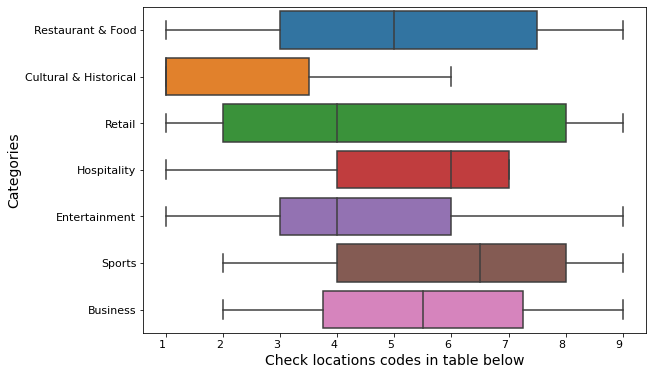

Code             Location
0    1           SPS AlSeef
1    2  SPS Arabian Ranches
2    3        SPS City Walk
3    4    SPS Palm Jumeirah
4    5           SPS La Mer
5    6               SPS D3
6    7       SPS Muraqqabat
7    8   SPS Sillicon Oasis
8    9  SPS Dubai Police HQ

In [300]:
plt.figure(figsize=(9, 6))

ax = sns.boxplot(x="code", y="categories", data=df_total)
ax.set_ylabel('Categories', fontsize=14)
ax.set_xlabel('Check locations codes in table below', fontsize=14)
ax.tick_params(labelsize=11)
plt.xticks(rotation=0, ha='right')
plt.show()

dfvenues = pd.DataFrame(
    {
        "Code": ['1','2','3','4','5','6','7','8','9'],
        "Location": ['SPS AlSeef','SPS Arabian Ranches','SPS City Walk','SPS Palm Jumeirah','SPS La Mer','SPS D3','SPS Muraqqabat','SPS Sillicon Oasis','SPS Dubai Police HQ']       
    }
)
dfvenues

## 4. Amount of Services close to SPS locations
In the bar-chart below we can visualize the numerical relation of different public services near to SPS locations.
Restaurant & Food category has 159 venues closer to a SPS locations in Dubai.

In [301]:
dfcat = df_total['categories'].value_counts()
dfcat

Restaurant & Food        159
Entertainment             35
Retail                    29
Hospitality               15
Sports                    14
Cultural & Historical      7
Business                   2
Name: categories, dtype: int64

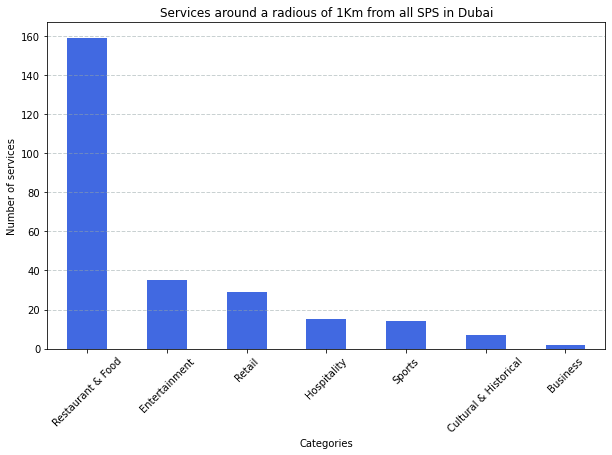

In [302]:
dfcat.plot(kind='bar', color='royalblue', figsize=(10, 6))

plt.xlabel('Categories') 
plt.ylabel('Number of services') 
plt.title('Services around a radious of 1Km from all SPS in Dubai')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5) 
plt.xticks(rotation=45)

plt.show()

## 5. Percentage of Services close to SPS locations
The percentual relation of public services near to SPS locations is rendered in the pie-chart below.
We can observe that the category Restorant & Food is the predominant service across all locations with a 60.9%.

In [303]:
dfcat2 = pd.DataFrame (dfcat,columns=['categories'])
dfcat2.reset_index(inplace=True)
dfcat2 = dfcat2.rename(columns = {'categories':'places'})
dfcat2 = dfcat2.rename(columns = {'index':'categories'})
dfcat2

categories  places
0      Restaurant & Food     159
1          Entertainment      35
2                 Retail      29
3            Hospitality      15
4                 Sports      14
5  Cultural & Historical       7
6               Business       2

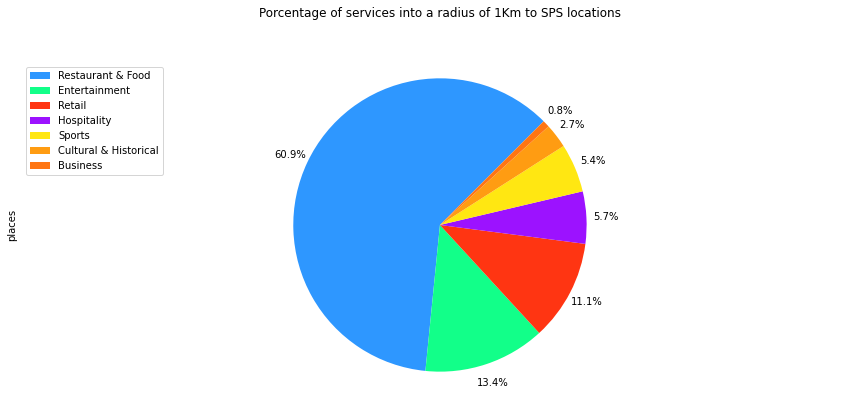

In [351]:
colors_list = ['#2e97ff','#12ff89','#ff3512', '#9c12ff', '#ffe712', '#ff9c12','#ff7512']
dfcat2['places'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=45,    
                            shadow=False,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.13,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            )

# scale the title up by 12% to match pctdistance
plt.title('Porcentage of services into a radius of 1Km to SPS locations', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=dfcat2.categories, loc='upper left') 

plt.show()

## 6. Segmentation & Geo-Distribution of public services at SPS locations

In [316]:
df_total.head()

name             categories  \
0    Arabian Tea House Cafe (كافية بيت الشاي العربي)      Restaurant & Food   
1                                     Baskin-Robbins      Restaurant & Food   
2  Al Fahidi Historical Neighbourhood (حي الفهيدي...  Cultural & Historical   
3                                      Coffee Museum      Restaurant & Food   
4  Sheikh Mohamed Centre For Cultural Understandi...  Cultural & Historical   

                              address        lat        lng  distance  code  
0                        Al Fahidi St  25.263399  55.299695       134     1  
1                       Al Ain Centre  25.264450  55.299994        23     1  
2  Al Fahidi Historical Neighbourhood  25.263920  55.299881        75     1  
3                      Old Town Dubai  25.263667  55.299817       103     1  
4                        Al Bastakiyh  25.264091  55.300795       112     1

In [327]:
#Adding venues column
df_total.loc[:,'venues'] = df_total.loc[:,'code']
df_total['venues'] = df_total['venues'].replace([1],'AlSeef')
df_total['venues'] = df_total['venues'].replace([2],'ArabRanches')
df_total['venues'] = df_total['venues'].replace([3],'CityWalk')
df_total['venues'] = df_total['venues'].replace([4],'PalmJumeirah')
df_total['venues'] = df_total['venues'].replace([5],'LaMer')
df_total['venues'] = df_total['venues'].replace([6],'D3')
df_total['venues'] = df_total['venues'].replace([7],'Muraqqabat')
df_total['venues'] = df_total['venues'].replace([8],'SilliconOasis')
df_total['venues'] = df_total['venues'].replace([9],'DubaiPoliceHQ')

#Changing categories to numerical values
df_total.loc[:,'catvalue'] = df_total.loc[:,'categories']
df_total['catvalue'] = df_total['catvalue'].replace(['Restaurant & Food'],1)
df_total['catvalue'] = df_total['catvalue'].replace(['Entertainment'],2)
df_total['catvalue'] = df_total['catvalue'].replace(['Retail'],3)
df_total['catvalue'] = df_total['catvalue'].replace(['Hospitality'],4)
df_total['catvalue'] = df_total['catvalue'].replace(['Sports'],5)
df_total['catvalue'] = df_total['catvalue'].replace(['Cultural & Historical'],6)
df_total['catvalue'] = df_total['catvalue'].replace(['Business'],7)

df_total.head()

name             categories  \
0    Arabian Tea House Cafe (كافية بيت الشاي العربي)      Restaurant & Food   
1                                     Baskin-Robbins      Restaurant & Food   
2  Al Fahidi Historical Neighbourhood (حي الفهيدي...  Cultural & Historical   
3                                      Coffee Museum      Restaurant & Food   
4  Sheikh Mohamed Centre For Cultural Understandi...  Cultural & Historical   

                              address        lat        lng  distance  code  \
0                        Al Fahidi St  25.263399  55.299695       134     1   
1                       Al Ain Centre  25.264450  55.299994        23     1   
2  Al Fahidi Historical Neighbourhood  25.263920  55.299881        75     1   
3                      Old Town Dubai  25.263667  55.299817       103     1   
4                        Al Bastakiyh  25.264091  55.300795       112     1   

   venues  catvalue  
0  AlSeef         1  
1  AlSeef         1  
2  AlSeef         6  
3  AlSeef         1  
4  AlSeef         6

In [330]:
df = pd.pivot_table(df_total,
                    index=['name','address','venues','lat','lng','distance']
                    ,columns='categories'
                    ,values='catvalue'
                   ).reset_index()
df = df.drop(columns=['name','address'])
df = df.rename_axis(None, axis=1)

df.head()

venues        lat        lng  distance  Business  \
0     CityWalk  25.204485  55.263050       251       NaN   
1   Muraqqabat  25.264991  55.327385       557       NaN   
2       AlSeef  25.266268  55.295146       506       NaN   
3           D3  25.189748  55.296924       313       NaN   
4  ArabRanches  25.056655  55.270219       194       NaN   

   Cultural & Historical  Entertainment  Hospitality  Restaurant & Food  \
0                    NaN            NaN          NaN                1.0   
1                    NaN            NaN          NaN                1.0   
2                    NaN            NaN          NaN                NaN   
3                    NaN            NaN          NaN                1.0   
4                    NaN            NaN          NaN                1.0   

   Retail  Sports  
0     NaN     NaN  
1     NaN     NaN  
2     3.0     NaN  
3     NaN     NaN  
4     NaN     NaN

In [332]:
#Tranforming NaN values to 0
df = df.fillna(0)
df.head(5)

venues        lat        lng  distance  Business  \
0     CityWalk  25.204485  55.263050       251       0.0   
1   Muraqqabat  25.264991  55.327385       557       0.0   
2       AlSeef  25.266268  55.295146       506       0.0   
3           D3  25.189748  55.296924       313       0.0   
4  ArabRanches  25.056655  55.270219       194       0.0   

   Cultural & Historical  Entertainment  Hospitality  Restaurant & Food  \
0                    0.0            0.0          0.0                1.0   
1                    0.0            0.0          0.0                1.0   
2                    0.0            0.0          0.0                0.0   
3                    0.0            0.0          0.0                1.0   
4                    0.0            0.0          0.0                1.0   

   Retail  Sports  
0     0.0     0.0  
1     0.0     0.0  
2     3.0     0.0  
3     0.0     0.0  
4     0.0     0.0

In [333]:
# Tranforming to integers
df.astype({'Business':'int','Cultural & Historical':'int','Entertainment':'int','Hospitality':'int','Restaurant & Food':'int','Retail':'int','Sports':'int'})
# df.drop(['venues'], axis=1, inplace=True)
df.head()

venues        lat        lng  distance  Business  \
0     CityWalk  25.204485  55.263050       251       0.0   
1   Muraqqabat  25.264991  55.327385       557       0.0   
2       AlSeef  25.266268  55.295146       506       0.0   
3           D3  25.189748  55.296924       313       0.0   
4  ArabRanches  25.056655  55.270219       194       0.0   

   Cultural & Historical  Entertainment  Hospitality  Restaurant & Food  \
0                    0.0            0.0          0.0                1.0   
1                    0.0            0.0          0.0                1.0   
2                    0.0            0.0          0.0                0.0   
3                    0.0            0.0          0.0                1.0   
4                    0.0            0.0          0.0                1.0   

   Retail  Sports  
0     0.0     0.0  
1     0.0     0.0  
2     3.0     0.0  
3     0.0     0.0  
4     0.0     0.0

In [334]:
# Data normalization

cluster_dataset = df.iloc[:,4:]
category_list = cluster_dataset.columns

X = cluster_dataset.values
cluster_dataset = pd.DataFrame(MinMaxScaler().fit_transform(X))
cluster_dataset.columns = category_list

cluster_dataset = cluster_dataset.reset_index(drop=True)
cluster_dataset.head()

Business  Cultural & Historical  Entertainment  Hospitality  \
0       0.0                    0.0            0.0          0.0   
1       0.0                    0.0            0.0          0.0   
2       0.0                    0.0            0.0          0.0   
3       0.0                    0.0            0.0          0.0   
4       0.0                    0.0            0.0          0.0   

   Restaurant & Food  Retail  Sports  
0                1.0     0.0     0.0  
1                1.0     0.0     0.0  
2                0.0     1.0     0.0  
3                1.0     0.0     0.0  
4                1.0     0.0     0.0

#### Elbow method of clustering

In [340]:
# set number of clusters
kclusters = 6

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0, n_init=20).fit(cluster_dataset)

kmeans_labels = kmeans.labels_

df_clusters = df.copy()
df_clusters['cluster'] = kmeans_labels
df_clusters['lat'] = df['lat']
df_clusters['lng'] = df['lng']

df_clusters_minmax = cluster_dataset.copy()
df_clusters_minmax['cluster'] = kmeans_labels
df_clusters_minmax['venues'] = df['venues']

df_clusters_minmax.head()

Business  Cultural & Historical  Entertainment  Hospitality  \
0       0.0                    0.0            0.0          0.0   
1       0.0                    0.0            0.0          0.0   
2       0.0                    0.0            0.0          0.0   
3       0.0                    0.0            0.0          0.0   
4       0.0                    0.0            0.0          0.0   

   Restaurant & Food  Retail  Sports  cluster       venues  
0                1.0     0.0     0.0        1     CityWalk  
1                1.0     0.0     0.0        1   Muraqqabat  
2                0.0     1.0     0.0        2       AlSeef  
3                1.0     0.0     0.0        1           D3  
4                1.0     0.0     0.0        1  ArabRanches

In [341]:
df_figures = df_clusters.groupby(['cluster']).size().reset_index(name='count')
print (df_figures)

   cluster  count
0        0      9
1        1    125
2        2     22
3        3     22
4        4     11
5        5     11


In [342]:
#Map setup

from branca.colormap import linear
import branca.colormap as cmp

cm_linear = linear.YlGnBu_09
cm_linear.index = intervals # bins
cm_linear.vmin=df_dxb['Population Density'].min()
cm_linear.vmax=df_dxb['Population Density'].max()

def style_function(feature):
    pop_d = feature['properties']['Population Density']
    return {
        'fillColor': '#fefff7' if pop_d < 4 else cm_linear(pop_d),
        'color': 'black',
        'weight': 1,
        'dashArray': '3, 3',
        'fillOpacity': 0.7,
    }

#DXB Coordinates
dxb_lat = 25.14
dxb_long = 55.25


#Map settings
dxb_map = folium.Map([dxb_lat,dxb_long], zoom_start=10.5)

folium.GeoJson(    
    df_dxb,
    name='Population Density',
    style_function=style_function,
    highlight_function= None,
    tooltip = folium.features.GeoJsonTooltip(['CNAME_E', 'Population 2019','Area Sq Km','Population Density' ], aliases=['Community:', 'Population:','Area Sq Km:','Density:'], labels=True)
).add_to(dxb_map)

#SPS locations

sps_location = folium.FeatureGroup(name='Smart Police Stations', overlay=True, control=True, show=True ).add_to(dxb_map)

for index, row in df_geo_sps.iterrows():
    popup_text = '{}, {}'.format(row['SPS_Name'], row['AREA'])
    popup_text = folium.Popup(popup_text, parse_html=True)    
    folium.Marker(location=(row['LAT'], row['LON']),
                        icon=folium.Icon(color="red", icon="map-marker"),
                        popup=popup_text,
                        parse_html=False,
                        fill=True).add_to(sps_location)


folium.LayerControl().add_to(dxb_map)

#============================================

# set color scheme for the clusters
colores = ['#2e97ff'
           , '#ff3512'
           , '#12ff89'
           , '#ffe712'
           , '#9c12ff'
           , '#ff9c12']


# add markers to map
markers_colors = []
for i, lat, lng, venues, cluster in zip(df_clusters.index
                                              , df_clusters['lat']
                                              , df_clusters['lng']
                                              , df_clusters['venues']
                                              , df_clusters['cluster']):
  

    sps_series = df_clusters.iloc[i]
    top_categories_dict = {}

    for cat in categories_list:
        top_categories_dict[cat] = sps_series[cat]
        
    top_categories = sorted(top_categories_dict.items(), key=lambda x: x[1], reverse=True)
  
    popup='{} Cluster {} | {} {}'.format(
          venues,
          cluster,
          top_categories[0][0],
          "{0:.2f}".format(top_categories[0][1]))
#           top_categories[1][0],
#           "{0:.2f}".format(top_categories[1][1]),
#           top_categories[2][0],
#           "{0:.2f}".format(top_categories[2][1]))
  
    label = folium.Popup(popup, parse_html=True)
    

    folium.CircleMarker(
                          [lat, lng],
                          radius=5,
                          popup=label,
                          color=colores[cluster-1],
                          fill=True,
                          fill_color=rainbow[cluster-1],
                          fill_opacity=0,
                          parse_html=False).add_to(dxb_map)

dxb_map

In the map above we can visualize the geo-distribution of public services in a radius of 1Km from each SPS location. The categories are also segment using different colors and every point provides information by clicking on it.

<img src="foooter.jpg" alt="footer">